<a href="https://colab.research.google.com/github/Dmarv/Resume/blob/Python/Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CIS-5450 Project: Analysis of Key Indicators for Heart Disease**

#Introduction

Per the Center For Disease Control, heart disease remains the leading cause of death for adults in the US. We have witnessed (ourselves or others) diagnoses of significant health conditions without previous awareness of the potential. Thus, data pertaining to a commonly diagnosed disease both piqued our interest and provided the opportunity for us to better keep ourselves aware/informed. 


The data provided from the kaggle source contains health factors that may correlate with heart disease. This data’s 400k entries come from the Center For Disease Control’s Behavioral Risk Factor Surveillance System (BRFSS) and has already been structured and cleaned. Our aim is to determine the fewest key features that can effectively predict who has (or will have) heart disease and to create a model mapping these key features to a boolean indicating heart disease. Using the various data analysis, visualization, and modeling tools we have learned throughout the course, we intend to strengthen our understanding of Feature Extraction and Modeling while better informing ourselves about heart disease. 

Note: Total notebook takes approximately 15 minutes to run. The Forward Step-Wise and Support Vector Machines (SVM) models take up most of the this time to run.

# Imports




In [ ]:
# General Imports
import numpy as npy
from numpy import nan
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import random

#Linear Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import svm, datasets

#Validation packages
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Model tuning
from sklearn.model_selection import GridSearchCV


#Preprosessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

#Classification Stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report


# Kaggle Data

In [ ]:
# Create the kaggle directory and read the uploaded kaggle.json file

# link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download dataset
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

# Unzip folder in Colab content folder
!unzip /content/personal-key-indicators-of-heart-disease.zip



mkdir: cannot create directory ‘/root/.kaggle’: File exists
personal-key-indicators-of-heart-disease.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/personal-key-indicators-of-heart-disease.zip
replace heart_2020_cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: heart_2020_cleaned.csv  


# Data Cleaning

Since the data has already undergone some EDA prior to being uploaded to Kaggle, our EDA focuses primarily on transforming the data through techniques liek one-hot-encoding & ordinal-encoding to prepare the data to be fed into ML models.

In [ ]:
# Read the csv file and save it to a dataframe called "heart_disease_df"
heart_disease_df = pd.read_csv('heart_2020_cleaned.csv')
heart_disease_df_revisited = heart_disease_df.copy()
heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:

# Replace yes and no with 1 and 0
heart_disease_df.replace(('Yes','No'), (1.0, 0), inplace=True)

# one-hot encode Race
dummy = pd.get_dummies(heart_disease_df[['Race']], prefix=['Race'])
# drop non-one-hot encoded Race
heart_disease_df.drop(['Race'], axis=1, inplace=True)
# join one-hot encoded data back to DataFrame
heart_disease_df = heart_disease_df.join(dummy)

# Deal with 'Yes (during pregnancy)' status and 'No, borderline diabetes' status under Diabetic
heart_disease_df.replace(('Yes (during pregnancy)'), (1.0), inplace=True)
heart_disease_df.replace(('No, borderline diabetes'), (0), inplace=True)

# Create a new column called "general_health_factor" that takes a ranked integer value between 0 and 4.
# Ordinal Encoding of GenHealth: Poor < Fair < Good < Very good < Excellent
scale_mapper = {"Poor":0, "Fair":1, "Good":2,"Very good":3,"Excellent":4}
heart_disease_df["general_health_factor"] = heart_disease_df["GenHealth"].replace(scale_mapper,regex=True)
heart_disease_df.drop(['GenHealth'], axis=1, inplace=True)

# Create a new column called "age_factor" that takes a ranked integer value between 0 and 12.
# Ordinal Encoding of AgeCategory: "18-24" < "25-29" < "30-34" < "35-39" < "40-44" < "45-49" < "50-54" < "55-59" < "60-64" < "65-69" < "70-74" < "75-79" < "80 or older"
scale_mapper = {"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, "60-64":8, "65-69":9, "70-74":10, "75-79":11, "80 or older":12}
heart_disease_df["age_factor"] = heart_disease_df["AgeCategory"].replace(scale_mapper,regex=True)
heart_disease_df.drop(['AgeCategory'], axis=1, inplace=True)

# Create a new column called "sex_factor" that takes a binary integer value (male: 0, female: 1.
scale_mapper = {"Male":0, "Female":1}
heart_disease_df["sex_factor"] = heart_disease_df["Sex"].replace(scale_mapper,regex=True)
heart_disease_df.drop(['Sex'], axis=1, inplace=True)

heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,general_health_factor,age_factor,sex_factor
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,1.0,1.0,...,1.0,0,0,0,0,0,1,3,7,1
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,3,12,1
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,1.0,...,0.0,0,0,0,0,0,1,1,9,0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,1,2,11,1
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,1.0,...,0.0,0,0,0,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,0.0,...,0.0,0,0,0,1,0,0,1,8,0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,1,0,0,3,3,0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,1,0,0,2,5,1
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,2,1,1


# Preliminary Analysis

Now that our data has been properly transformed, let's take a look at the correlation matrix to determine how much colinearity there between the features.

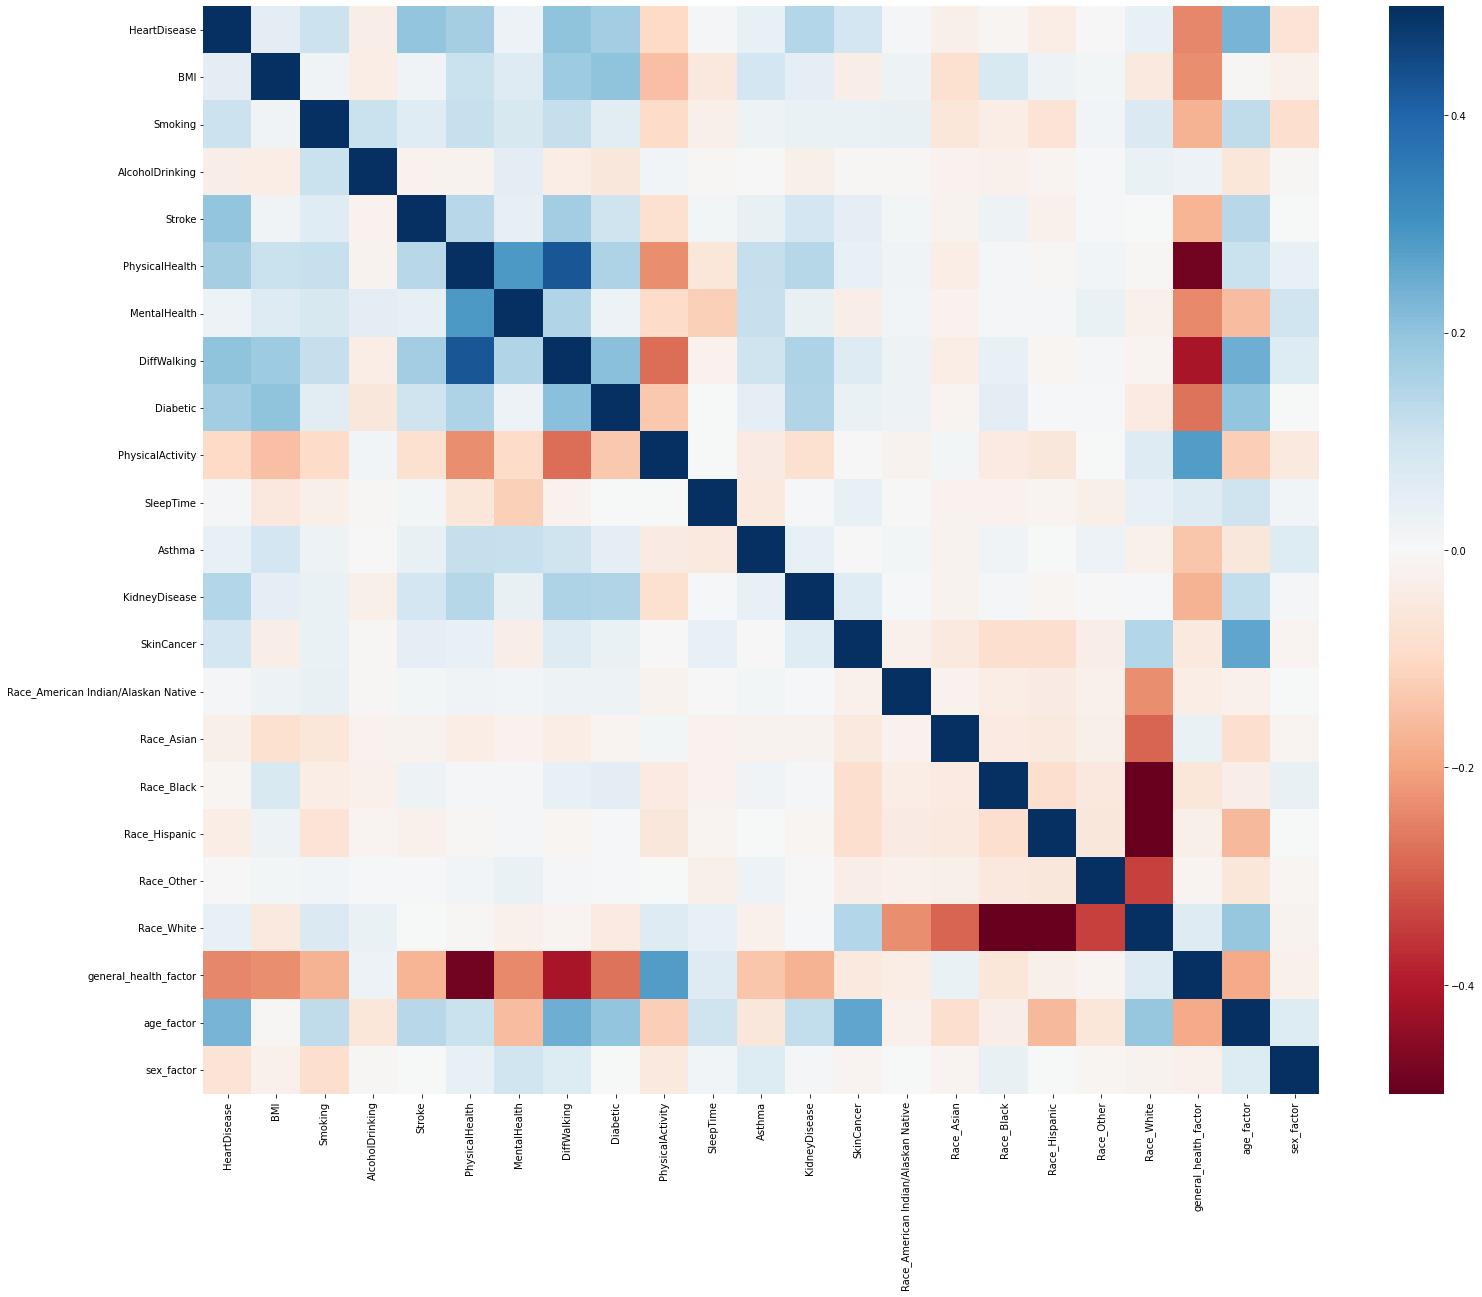

In [ ]:
#As symbols are harder to scan than colors, we plot a heatmap. 
cor_matrix = heart_disease_df.corr()
fig, size = plt.subplots(figsize=(25, 20)) 
sns.heatmap(data=cor_matrix, vmin=-0.5, vmax=0.5, center=0, cmap='RdBu', ax=size)
plt.show()

Note: Scaling is between +0.5 and -0.5 (not +1.0 and -1.0), as there were no significantly strong correlations between features

Based on the visualization of the correlation matrix, we see some noticable correlations between the below features. 

Physical Health is measure as how many days in the past 30 did you not feel well.

- Difficulty Walking and Physical Health (Positive) - This makes sense as if one was feeling worse over the past 30 days they may encouter difficulty walking
- Physical Health and General Health (Negative) - As general health is ordinal encoded as 0-4 where 0 is poor and 4 is excellent, we expect ones general health to negatively correlate with the number of days one feels unwell
- Physical Activity and Physical Health (Negative) - As expected, one would be healthier (lower ranking in Physical Health category) if they have higher physical activity. ANother way to look at this is that one would have higher physical activity when in better physical health.
- Heart Disease and sex_factor (Negative) - As sex_factor is one-hot encoded as male-0 and female-1, this suggests that males are more prone to heart disease than females

Before we dive right into the ML models, let's do one more simple analysis of the the feature data. Specifically, let's look at the statistical significance (z-score) of the features.

In [ ]:
#Let's separately extract the features and label/classification
features = heart_disease_df.copy()
features.drop(['HeartDisease'], axis=1, inplace=True)
labels = heart_disease_df['HeartDisease']

In [ ]:
#Find statistical significance 
stat_sig = features.copy()
stat_sig.rename(columns = {'Race_American Indian/Alaskan Native':'Race_AmericanIndian__AlaskanNative'}, inplace = True)
stat_sig_full = heart_disease_df.copy()
stat_sig_full.rename(columns = {'Race_American Indian/Alaskan Native':'Race_AmericanIndian__AlaskanNative'}, inplace = True)
text = 'HeartDisease~BMI'
columns = stat_sig.columns
for colu in columns:
    text = text + '+' + str(colu)
    
text

fit1 = smf.glm(text, data = stat_sig_full, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                            GLM   Df Residuals:                   319773
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72636.
Date:                Fri, 16 Dec 2022   Deviance:                   1.4527e+05
Time:                        16:26:05   Pearson chi2:                 2.97e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

From, the statistical test results, we can see that both Physical Activity and Physical Health may not be statistically significant with respect to Heart Disease. We see this by comparing the 'P>|z|' to the confidence interval values (columns 0.025 and 0.975). In other words, we are not confident that the coefficients for Physical Activuty and Physical Health are not 0. Since we are unsure of any interaction effects between these two features and other features, let's just take these results with a grain of salt and still include them in our models.

# ML Modeling
Let's first perform some unsupervised ML before feeding our data to supervised ML models. 

## PCA
Let's start with some Principal Component Analysis (PCA) to potentially reduce the number of features and reduce collinearity. 

In [ ]:
# Conduct 80/20 train-test split with random_state = 42
x_train, x_test, y_train, y_test = train_test_split(features, labels, train_size = 0.5, test_size = 0.5, random_state = 42)

In [ ]:
#First, scale data for equivalent comparison
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)



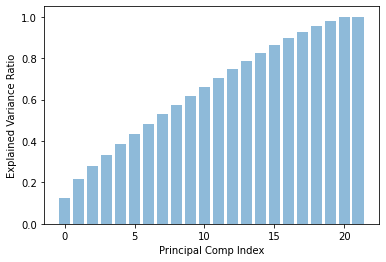

In [ ]:
#transform to PCA
pca = PCA(n_components=len(features.columns)) #Start with all features
x_train_pca = pca.fit_transform(x_train_sc)

# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = npy.cumsum(explained_variance_ratios)

#Plot the explained variance ratios to determined ideal # principal components
plt.xlabel('Principal Comp Index')
plt.ylabel('Explained Variance Ratio')
plt.bar(range(0,len(explained_variance_ratios)), cum_evr, label='Cummulative Explained Variance Ratios', align='center', alpha=0.5)
plt.show()






We see that we cannot reduce our current number of features by that much. Let's still give it a try. They explained variance ratio levels off around 19. We will compare performance between the data and data transformed with PCA. We will ROC AUC to evaluate their performance as it is a better metric for unbalanced data (we will investigate data imbalance later).

In [ ]:
#Perform Final PCA based on new number of principal components
pca = PCA(n_components=19)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

In [ ]:
# ROC AUC helper function

def plot_roc_curve(x_test, y_test, model, text):
    y_pred_prob = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    plt.title('ROC ' + text)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, label="AUC="+str(auc))
    plt.legend(loc=4)
    plt.show()
    plt.clf()


### Logistic Regression (Unregularized)

accuracy score w/o PCA:  0.9156024465596818
[[144911   1310]
 [ 12185   1492]]


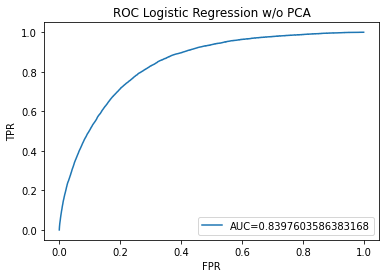

accuracy score with PCA:  0.9148707300904326
[[144851   1370]
 [ 12242   1435]]


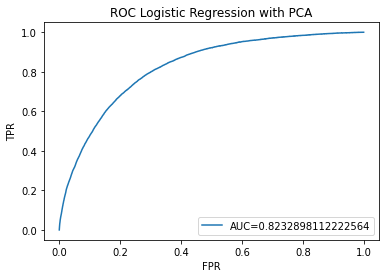

<Figure size 432x288 with 0 Axes>

In [ ]:
#Instantiate, fit, predict, and score logistic regression 

# Without PCA
#Instantiate, fit, predict, and score logistic regression
reg = LogisticRegression()
reg_model = reg.fit(x_train_sc, y_train)
y_pred = reg.predict(x_test_sc)
print("accuracy score w/o PCA: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_roc_curve(x_test_sc, y_test, reg, "Logistic Regression w/o PCA")

# With PCA
reg_pca = LogisticRegression()
reg_model = reg_pca.fit(x_train_pca, y_train)
y_pred = reg_pca.predict(x_test_pca)
print("accuracy score with PCA: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_roc_curve(x_test_pca, y_test, reg_pca, "Logistic Regression with PCA")

We see here that PCA does not help with analysis since it only removes 3 features and decreases interpretability. 
We will proceed without PCA to aid in interpretability.

## Data Balance

It's wellknown that Health Data often imbalanced favoring healthy participants.

In [ ]:
grouped_heart_disease = heart_disease_df.groupby('HeartDisease')["BMI"].count()
print(grouped_heart_disease)

HeartDisease
0.0    292422
1.0     27373
Name: BMI, dtype: int64


We see that non-heart disease has over 10x more data points. We will under and over sample to account for this.

In [ ]:
#Undersampling WITH SC DATA
rus = RandomUnderSampler(random_state=1)
x_rus, y_rus = rus.fit_resample(x_train_sc, y_train)
x_test_rus, y_test_rus = rus.fit_resample(x_test_sc, y_test)


#Oversampling
ros = RandomOverSampler(random_state=1)
x_ros, y_ros = ros.fit_resample(x_train_sc, y_train)
x_test_ros, y_test_ros = ros.fit_resample(x_test_sc, y_test)

accuracy score undersample:  0.7655553118373912
[[10307  3370]
 [ 3043 10634]]


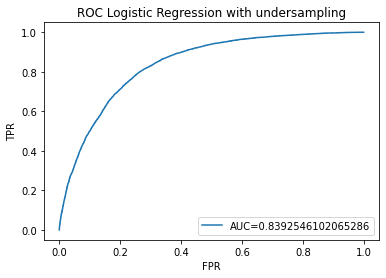

accuracy score oversample:  0.7639189993229427
[[109683  36538]
 [ 32502 113719]]


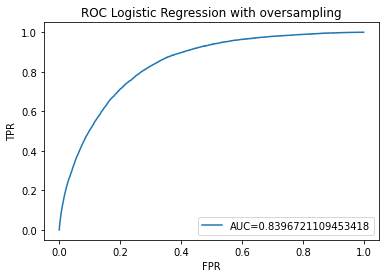

<Figure size 432x288 with 0 Axes>

In [ ]:
#Logistic Regression 

# Undersample
reg = LogisticRegression()
reg_model = reg.fit(x_rus, y_rus)
y_pred = reg.predict(x_test_rus)
print("accuracy score undersample: ", accuracy_score(y_test_rus, y_pred))
print(confusion_matrix(y_test_rus, y_pred))
plot_roc_curve(x_test_rus, y_test_rus, reg, "Logistic Regression with undersampling")

# Oversample
reg = LogisticRegression()
reg_model = reg.fit(x_ros, y_ros)
y_pred = reg.predict(x_test_ros)
print("accuracy score oversample: ", accuracy_score(y_test_ros, y_pred))
print(confusion_matrix(y_test_ros, y_pred))
plot_roc_curve(x_test_ros, y_test_ros, reg, "Logistic Regression with oversampling")

Both under and over sampling are roughly the same and undersampling outperforms slightly. We will go with undersampling for the rest of our analyses.

Let's do some k-means clustering for fun

In [ ]:
#Apply K-Means Clustering

km = KMeans(n_clusters=2, n_init=1, max_iter=300, random_state=0)
km.fit(x_rus)
y_pred_km = km.predict(x_test_rus)
print("accuracy score: ", accuracy_score(y_test_rus, y_pred_km))
print(confusion_matrix(y_test_rus, y_pred_km))


accuracy score:  0.6572713314323316
[[12057  1620]
 [ 7755  5922]]


Accuracy for basic K-means with 2 clusters is poor. Let's try some advanced K-means analysis to improve accuracy

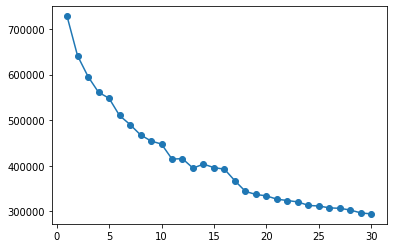

In [ ]:
distortions = []
max_k = 30
for i in range(1, max_k+1):
    km = KMeans(n_clusters=i, init='random', n_init=1, max_iter=300, random_state=1)
    km.fit(x_rus)
    distortions.append(km.inertia_)
plt.plot(range(1,max_k+1),distortions,marker='o')

It seems that distortion flattens out breifly around 19 clusters. This is far from the initial 2 clusters that we intended for the binary classification. Since logistic regression outperforms k-means clustering, lets stick with supervised learning.

## Logistic Regression (Regularized)

Let's add some Regularization to account for potential multicolinearity and/or overfitting

accuracy score for Lasso/L1 Logistic Regression:  0.7462528332236602
[[ 9887  3790]
 [ 3151 10526]]


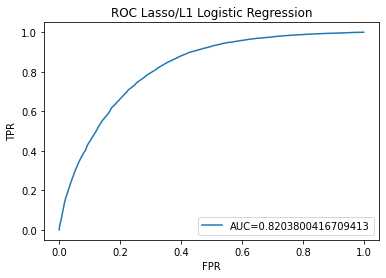

BMI 0.0
Smoking 0.0
AlcoholDrinking 0.0
Stroke 0.08347120711174874
PhysicalHealth 0.0
MentalHealth 0.0
DiffWalking 0.016054189424482005
Diabetic 0.036124313372562944
PhysicalActivity 0.0
SleepTime 0.0
Asthma 0.0
KidneyDisease 0.0
SkinCancer 0.0
Race_American Indian/Alaskan Native 0.0
Race_Asian 0.0
Race_Black 0.0
Race_Hispanic 0.0
Race_Other 0.0
Race_White 0.0
general_health_factor -0.38752869376472215
age_factor 0.5309430925315385
sex_factor 0.0


<Figure size 432x288 with 0 Axes>

In [ ]:
# Let's add LASSO/L1 penalty to our logictic regression model
lasso = LogisticRegression(penalty='elasticnet', solver='saga', C=0.0005, l1_ratio=1)
lasso.fit(x_rus, y_rus)
y_pred1 = lasso.predict(x_test_rus)
print("accuracy score for Lasso/L1 Logistic Regression: ", accuracy_score(y_test_rus, y_pred1))
print(confusion_matrix(y_test_rus, y_pred1))
plot_roc_curve(x_test_rus, y_test_rus, lasso, "Lasso/L1 Logistic Regression")

for i in range(len(features.columns)):
  print(features.columns[i], lasso.coef_[0][i])

accuracy score for Ridge/L2 Logistic Regression:  0.7655187541127441
[[10307  3370]
 [ 3044 10633]]


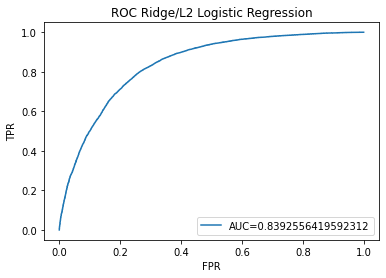

BMI 0.0449034527039767
Smoking 0.18330118902279913
AlcoholDrinking -0.058391136863446
Stroke 0.22793999497703246
PhysicalHealth 0.0372117225724188
MentalHealth 0.047761613510079196
DiffWalking 0.0874427593059962
Diabetic 0.1587382272863582
PhysicalActivity 0.02229963825914533
SleepTime -0.045615920145821456
Asthma 0.09925404648780074
KidneyDisease 0.10937890226325704
SkinCancer 0.032942741223476686
Race_American Indian/Alaskan Native 0.015240360138762917
Race_Asian -0.05194857060544307
Race_Black -0.028550169438177044
Race_Hispanic 0.009890089894188185
Race_Other 0.016129313068291552
Race_White 0.018719456665641804
general_health_factor -0.5535807311395233
age_factor 1.035548850230788
sex_factor -0.3927782958773654


<Figure size 432x288 with 0 Axes>

In [ ]:
# Let's add Ridge/L12 penalty to our logictic regression model
ridge = LogisticRegression(penalty='elasticnet', solver='saga', C=0.5, l1_ratio=0)
ridge.fit(x_rus, y_rus)
y_pred2 = ridge.predict(x_test_rus)
print("accuracy score for Ridge/L2 Logistic Regression: ", accuracy_score(y_test_rus, y_pred2))
print(confusion_matrix(y_test_rus, y_pred2))

plot_roc_curve(x_test_rus, y_test_rus, ridge, "Ridge/L2 Logistic Regression")

for i in range(len(features.columns)):
  print(features.columns[i], ridge.coef_[0][i])

accuracy score for Elastic Net Logistic Regression:  0.763325290633911
[[10360  3317]
 [ 3157 10520]]


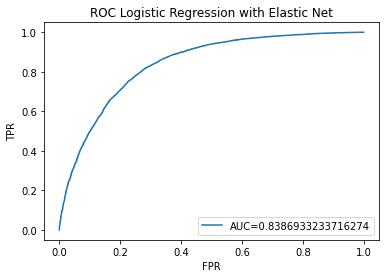

BMI 0.010173815754049449
Smoking 0.15443935538700793
AlcoholDrinking -0.023636282706349012
Stroke 0.2034037492831298
PhysicalHealth 0.04877773449439946
MentalHealth 0.0013861867544778957
DiffWalking 0.09838215585688079
Diabetic 0.15200477529469358
PhysicalActivity 0.0
SleepTime -0.007730283070539451
Asthma 0.05827281019454291
KidneyDisease 0.0979086710578269
SkinCancer 0.036764743694097254
Race_American Indian/Alaskan Native 0.0
Race_Asian -0.011800705528607807
Race_Black -0.0027319959960896856
Race_Hispanic 0.0
Race_Other 0.0
Race_White 0.006535812889671291
general_health_factor -0.4942701094864675
age_factor 0.8466336770131244
sex_factor -0.3130095056927777


<Figure size 432x288 with 0 Axes>

In [ ]:

# Let's add Elastic Net penalty to our logictic regression model
elastic = LogisticRegression(penalty='elasticnet', solver='saga', C=0.002, l1_ratio=0.3)
elastic.fit(x_rus, y_rus)
y_pred3 = elastic.predict(x_test_rus)
print("accuracy score for Elastic Net Logistic Regression: ", accuracy_score(y_test_rus, y_pred3))
print(confusion_matrix(y_test_rus, y_pred3))
plot_roc_curve(x_test_rus, y_test_rus, elastic, "Logistic Regression with Elastic Net")

for i in range(len(features.columns)):
  print(features.columns[i], elastic.coef_[0][i])


We saw with PCA that we have little multicolinearity. As expected, regularizing our logistic regressions did not add much.

Now let's try some other classifiers and compare the results

## Decision Tree Classifier


accuracy score for Decision Tree CLassifier:  0.6716019594940411
[[9269 4408]
 [4575 9102]]


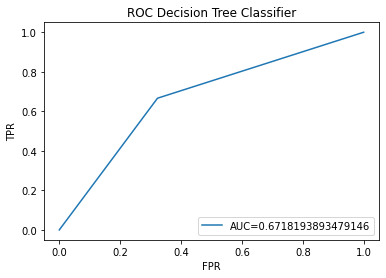

<Figure size 432x288 with 0 Axes>

In [ ]:
#Decision Tree Classifier

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_rus, y_rus)
y_pred_decTree = clf.predict(x_test_rus)
#tree.plot_tree(clf)
print("accuracy score for Decision Tree CLassifier: ", accuracy_score(y_test_rus, y_pred_decTree))

print(confusion_matrix(y_test_rus, y_pred_decTree))

plot_roc_curve(x_test_rus, y_test_rus, clf, "Decision Tree Classifier")



The Decision Tree Classifier does slighly worse

## Adaptive Boosting

accuracy score:  0.7015061782554654
[[10050  3627]
 [ 4538  9139]]


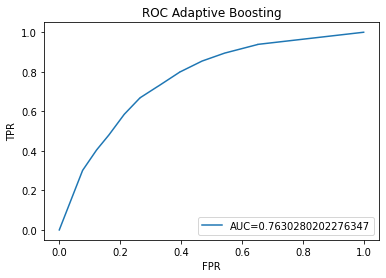

<Figure size 432x288 with 0 Axes>

In [ ]:
tree = tree.DecisionTreeClassifier(criterion='entropy')
abc = AdaBoostClassifier(base_estimator=tree,n_estimators=10, learning_rate=0.1, random_state=0)
abc.fit(x_rus, y_rus)

y_pred_abc = abc.predict(x_test_rus)
print("accuracy score: ", accuracy_score(y_test_rus, y_pred_abc))

print(confusion_matrix(y_test_rus, y_pred_abc))
plot_roc_curve(x_test_rus, y_test_rus, abc, "Adaptive Boosting")

We see further improvement in our modeling 

## Random Forest Classifier

accuracy score for random Forest :  0.7564158806755867
[[ 9877  3800]
 [ 2863 10814]]


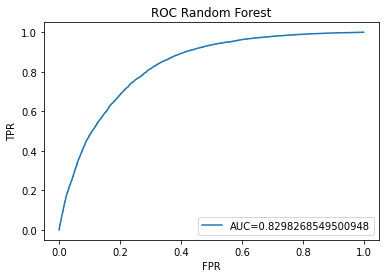

<Figure size 432x288 with 0 Axes>

In [ ]:
rand_forest = RandomForestClassifier(max_depth= 20, random_state = 20)
rand_forest.fit(x_rus, y_rus)
rand_y_pred = rand_forest.predict(x_test_rus)
print("accuracy score for random Forest : ", accuracy_score(y_test_rus, rand_y_pred))

print(confusion_matrix(y_test_rus, rand_y_pred))
plot_roc_curve(x_test_rus, y_test_rus, rand_forest, "Random Forest")

Let's try improving the accuracy by limiting the depth of the tree

8 0.7649338305183885


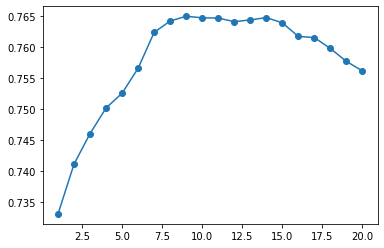

In [ ]:
accuracies = []
max_depth = 20
for i in range(1, max_depth+1):
    clf = RandomForestClassifier(max_depth=i, random_state=1)
    clf=clf.fit(x_rus, y_rus)
    y_pred_decTree = clf.predict(x_test_rus)
    accuracies.append(accuracy_score(y_test_rus, y_pred_decTree))
plt.plot(range(1,max_depth+1),accuracies,marker='o')

print(accuracies.index(max(accuracies)), max(accuracies))

Looks like the accuracy declines after max depth of 15.

accuracy score for random Forest :  0.7628865979381443
[[ 9943  3734]
 [ 2752 10925]]


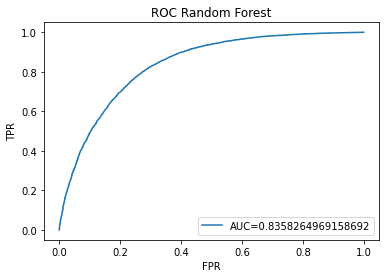

<Figure size 432x288 with 0 Axes>

In [ ]:
# We use the best params based on our depth analysis
rand_for_class_best = RandomForestClassifier(max_depth= 15, random_state = 20)
rand_for_class_best.fit(x_rus, y_rus)
rand_y_pred = rand_for_class_best.predict(x_test_rus)
print("accuracy score for random Forest : ", accuracy_score(y_test_rus, rand_y_pred))

print(confusion_matrix(y_test_rus, rand_y_pred))
plot_roc_curve(x_test_rus, y_test_rus, rand_for_class_best, "Random Forest")

## Support Vector Machine 

In [ ]:
#c = 1, gamma = 1, 71%, 7 mins to run


svc = svm.SVC(C=1, kernel='rbf',gamma=1, random_state=42)
svc.fit(x_rus,y_rus)
y_pred_svm = svc.predict(x_test_rus)
print("accuracy score for Support Vecotr Machines : ", accuracy_score(y_test_rus, y_pred_svm))

print(confusion_matrix(y_test_rus, y_pred_svm))


accuracy score for Support Vecotr Machines :  0.710499378518681
[[ 8049  5628]
 [ 2291 11386]]


## Forward Stepwise Model Selection with Random Forests

Let's take a look how well different subsets of our features work. We will use the forward stepwise technique which is a greedy algorithm. It start with 1 feature and works its way up to n=k features picking the feature which most increases the prediction accuracy next. We chose random forests as they performed the best and run quickly.

This analysis only adds to our understanding of the data if we do not transform it via PCA first.

In [ ]:
def one_round_forward(feature_list, chosen_cols, labels, dataframe):
    feature_history = []
    for i in range(len(feature_list)):
        #build new dataframe
        current_model = chosen_cols.copy()
        current_model.append(feature_list[i])
        next_model_features = dataframe[current_model]

        #split up data
        x_train_fsm, x_test_fsm, y_train_fsm, y_test_fsm = train_test_split(next_model_features, labels, train_size = 0.8, test_size = 0.2, random_state = 42)

        #scale the data
        sc = StandardScaler()
        sc.fit(x_train_fsm)
        x_train_fsm_sc = sc.transform(x_train_fsm)
        x_test_fsm_sc = sc.transform(x_test_fsm)

        #fix sample sizing
        rus = RandomUnderSampler(random_state=1)
        x_fsm_rus, y_fsm_rus = rus.fit_resample(x_train_fsm_sc, y_train_fsm)
        x_test_fsm_rus, y_test_fsm_rus = rus.fit_resample(x_test_fsm_sc, y_test_fsm)

        #run random forest classifier
        rand_for_class_best = RandomForestClassifier(max_depth= 11, random_state = 20)
        rand_for_class_best.fit(x_fsm_rus, y_fsm_rus)
        rand_y_pred = rand_for_class_best.predict(x_test_fsm_rus)

        #store data
        feature_history.append((accuracy_score(y_test_fsm_rus, rand_y_pred), feature_list[i]))

    best_feat = max(feature_history)
    return best_feat[1], best_feat[0]


def full_forward(feature_list, labels, vkp_copy):
    
    cols_remaining = feature_list.copy()
    chosen_cols = []
    round_best = []
    
    for i in range(len(feature_list)):
        best_feat, accuracy = one_round_forward(cols_remaining, chosen_cols, labels, vkp_copy)     
        chosen_cols.append(best_feat)
        print(chosen_cols, accuracy)
        round_best.append((accuracy, chosen_cols))
        cols_remaining = list(set(cols_remaining) - set([best_feat]))
        
    return round_best


In [ ]:

feature_list = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'general_health_factor', 'age_factor', 'sex_factor']
labels = heart_disease_df['HeartDisease']


#Runtime is about 6 minutes

models = full_forward(feature_list, labels, heart_disease_df)

['age_factor'] 0.6863376251788269
['age_factor', 'general_health_factor'] 0.7398962804005722
['age_factor', 'general_health_factor', 'sex_factor'] 0.7491952789699571
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke'] 0.7572424892703863
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke', 'Race_White'] 0.7594778254649499
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke', 'Race_White', 'Race_Asian'] 0.7599248927038627
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke', 'Race_White', 'Race_Asian', 'KidneyDisease'] 0.7602825464949928
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke', 'Race_White', 'Race_Asian', 'KidneyDisease', 'Asthma'] 0.7612660944206009
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke', 'Race_White', 'Race_Asian', 'KidneyDisease', 'Asthma', 'Race_Black'] 0.7614449213161659
['age_factor', 'general_health_factor', 'sex_factor', 'Stroke', 'Race_White', 'Race_Asian', 'KidneyDisease', 'Asthma', 'Race_

While all of the features do produce a pretty good model, we see great diminishing returns after only a few features were added to the random forest model. This suggests that with respect to random forest models, screening for heart disease may be as effective with many fewer features queried. 

## Nerual Network

Now let's trying running our data through a binary classification neural net model

### Imports and setup for NN

In [ ]:
%%capture
!pip3 install mxnet
!pip3 install --upgrade gluoncv

import mxnet as mx
from gluoncv.utils import viz
from mxnet.gluon.data import DataLoader
from mxnet.gluon.data.vision import transforms, ImageFolderDataset
from mxnet import np
import shutil
import os
import glob
import pandas as pd
import seaborn as sns
import cv2
from mxnet import np, npx

from mxnet import gluon, autograd, ndarray, nd
from mxnet.gluon import nn, loss as gloss


npx.set_np()
npx.num_gpus()

### NN Implementation
Transfrom data into proper type for mxnet

In [ ]:
#train data
y_rus_list = y_rus.tolist()
input_data = []
counter = 0

# reshape and convert to nd array, place data and label in tuple then store in input array
for i in range(len(x_rus)):
    data = mx.nd.array(npy.reshape(npy.asarray(x_rus[counter], dtype = np.float32), (1, 22))).as_np_ndarray()
    label = mx.nd.array(npy.reshape(npy.asarray(y_rus_list[counter], dtype = np.float32), (1, 1))).as_np_ndarray()
    input_data.append((data, label))
    counter+=1

# shuffle train data
IRuDS = input_data.copy()
random.shuffle(IRuDS)


# test data
y_test_list = y_test_rus.tolist()
test = []
counter = 0

# reshape and convert to nd array, place data and label in tuple then store in test array
for i in range(len(x_test_rus)):
    data = mx.nd.array(npy.reshape(npy.asarray(x_test_rus[counter], dtype = np.float32), (1, 22))).as_np_ndarray()
    label = mx.nd.array(npy.reshape(npy.asarray(y_test_list[counter], dtype = np.float32), (1, 1))).as_np_ndarray()
    test.append((data, label))
    counter+=1



Define train model. It returns the final training loss and the final training accuracy.

In [ ]:

# The function should return the final training loss and the final training accuracy
def train_network(net, input_data, criterion, trainer, metric, epochs = 10):
    

    loss_history = []
    accuracy_history = [0]
    counter = 0
    ac_counter = 0

    for epoch in range(epochs):
        metric.reset()

        for i, (data, label) in enumerate(input_data):

            data = data.as_in_context(ctx)
            label = label.as_in_context(ctx)

            with autograd.record():
                pred = net(data)
                loss = criterion(pred, label)
            loss.backward()
            trainer.step(1)
            metric.update(label, pred.as_nd_ndarray())
            # as the model did not improve past a few epoch, print every 5000 data points
            if (i+1) % 5000 == 0:
                print("Round: %s, Accuracy: %s, Loss: %s " % (i, metric.get()[1],np.mean(loss)))
                ac_counter+=1
                

        #store history for graphing later
        accuracy_history.append(metric.get()[1])
        loss_history.append(np.mean(loss))
        ac_counter+=1

        print("Epoch: %s, Accuracy: %s, Loss: %s" % (epoch, accuracy_history[-1], loss_history[-1]))


    final_training_accuracy = accuracy_history[-1] #Final training accuracy
    final_training_loss = loss_history[-1] #Final training loss
    return final_training_accuracy, float(final_training_loss), loss_history, accuracy_history

Define test model.

In [ ]:
def test_model(net, criterion, test, metric):
    
    metric.reset()

    for i, (data, label) in enumerate(test):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        pred = net(data)
        loss = criterion(pred, label)
        metric.update(label, pred.as_nd_ndarray()) 

    testing_accuracy = metric.get()[1] #Final training accuracy
    testing_loss = np.mean(loss) #Final training loss

    return  float(testing_loss), float(testing_accuracy)

Here we contruct the network and add different size layers with some trial and error. 

In [ ]:
def construct_net():
    # Initialize a gluon sequential model
    net = gluon.nn.Sequential()
    with net.name_scope():
      #Add a gluon dense layer to the model
        net.add(gluon.nn.Dense(16, activation='relu'))
        net.add(gluon.nn.Dense(5, activation='relu'))
        net.add(gluon.nn.Dense(5, activation='relu'))
        net.add(gluon.nn.Dense(5, activation='relu'))
        net.add(gluon.nn.Dense(5, activation='relu'))
        net.add(gluon.nn.Dense(5, activation='relu'))
        net.add(gluon.nn.Dense(2))
    return net

net = construct_net()

# Set the context to use the available GPUs, otherwise just use a CPU
ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()


# initialize params
net.collect_params().initialize(mx.init.Xavier(), ctx=ctx)

#define loss
criterion = gluon.loss.SoftmaxCrossEntropyLoss()

#learning rate
optimizer_params = {'learning_rate': 0.0005}
trainer = gluon.Trainer(net.collect_params(), 'adam', optimizer_params)



Let's check to see if the model initialized

In [ ]:
x = mx.sym.var('data').as_np_ndarray()
sym = net(x)
mx.viz.print_summary(sym)


________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential1_dense0_fwd(FullyConnected)                                      16          data                            
________________________________________________________________________________________________________________________
sequential1_dense0_relu_fwd(Activation)                                     0           sequential1_dense0_fwd          
________________________________________________________________________________________________________________________
sequential1_dense1_fwd(FullyConn

Train our neural net

In [ ]:
#Runtime is about 5 minutes
epochs = 2
metric = mx.metric.Accuracy()
inp = IRuDS
training_accuracy, training_loss, loss_history, accuracy_history = train_network(net, inp, criterion, trainer, metric, epochs)
print(training_accuracy, training_loss)

Round: 4999, Accuracy: 0.7188, Loss: 1.1824622 
Round: 9999, Accuracy: 0.7338, Loss: 0.72229755 
Round: 14999, Accuracy: 0.7383333333333333, Loss: 1.4801979 
Round: 19999, Accuracy: 0.74065, Loss: 1.2465432 
Round: 24999, Accuracy: 0.74248, Loss: 0.08734032 
Epoch: 0, Accuracy: 0.744487441588785, Loss: 0.15143743
Round: 4999, Accuracy: 0.7676, Loss: 0.8817799 
Round: 9999, Accuracy: 0.7638, Loss: 1.1115392 
Round: 14999, Accuracy: 0.7624666666666666, Loss: 1.8494829 
Round: 19999, Accuracy: 0.7606, Loss: 1.1863823 
Round: 24999, Accuracy: 0.75944, Loss: 0.11922661 
Epoch: 1, Accuracy: 0.7604044976635514, Loss: 0.12927693
0.7604044976635514 0.12927693128585815


Test our neural net

In [ ]:
#test our network
metric = mx.metric.Accuracy()  
testing_loss, testing_accuracy = test_model(net, criterion, test, metric)

print("Neural Net - the testing loss is ", str(testing_loss))
print("Neural Net - the testing accuracy is ", str(testing_accuracy))



Neural Net - the testing loss is  0.22757162153720856
Neural Net - the testing accuracy is  0.7621188857205528


Confusion matrix for the Neural Netowrk

In [ ]:
y_hat = []
y_true = []
for i, (data, label) in enumerate(test):
    real = npy.asarray(label, dtype=int).tolist()[0]
    y_true.append(real)
    pred = npy.asarray(net(data).argmax(), dtype=int).tolist()
    y_hat.append(pred)

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_hat), columns=['Actual No Heart Disease (0)', 'Actual Heart Disease (1)'])
confusion_matrix_df

,Actual No Heart Disease (0),Actual Heart Disease (1)
0,9183,4494
1,2013,11664


We can see that we have only marginal improvements even with the nerual network. This suggests that our data itself may need relooking at. 

# Ensembles

Let's try combinding our models together with a majority vote and run some accuracy tests on that

In [ ]:
y_pred_reg = lasso.predict(x_test_rus) # Logistic Regression LASSO
y_pred_rand = rand_for_class_best.predict(x_test_rus) # Random Forest
y_pred_abc = abc.predict(x_test_rus) # Adaptive Boosting
y_pred_svm = svc.predict(x_test_rus) # Support Vector Machine
y_pred_decTree = clf.predict(x_test_rus) # Decision Tree


Place data in DataFrame

In [ ]:
models_df = pd.DataFrame({'Regression': y_pred_reg,
     'RandForest': y_pred_rand,
     'Boosting': y_pred_abc,
     'SVM': y_pred_svm,
     'Neural Net': y_hat,
     'y_true': y_test_rus 
    })
models_df


,Regression,RandForest,Boosting,SVM,Neural Net,y_true
0,1.0,1.0,0.0,1.0,1,0.0
1,0.0,0.0,0.0,1.0,0,0.0
2,0.0,0.0,0.0,0.0,0,0.0
3,0.0,0.0,1.0,1.0,0,0.0
4,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...
27349,0.0,1.0,1.0,1.0,1,1.0
27350,1.0,1.0,1.0,1.0,1,1.0
27351,0.0,1.0,0.0,1.0,1,1.0
27352,1.0,1.0,1.0,1.0,1,1.0


Perform majority vote and keep track of the voting results and relavent locations. As the decision tree reduces the overall accuracy and wanted an odd number to avoid tying, we left it out.

In [ ]:
correct = 0
agree = 0

five_zero_and_correct = 0
five_zero_and_wrong = 0

four_one_and_correct = 0
four_one_and_wrong = 0

three_two_and_correct = 0
three_two_and_wrong = 0

#  y_pred_decTree[i] this did the worst leave out

test_len = len(y_test_rus)

agreed_and_correct_loc = []
agreed_and_wrong_loc = []

y_pred_ensemble_list =[]

for i in range(test_len):
    total =  y_pred_reg[i] + y_pred_rand[i] + y_pred_abc[i] + y_pred_svm[i] + y_hat[i]
    y_pred_ensemble = round(( y_pred_reg[i] + y_pred_rand[i] + y_pred_abc[i] + y_pred_svm[i] + y_hat[i])/5)
    y_pred_ensemble_list.append(y_pred_ensemble)
    # agree
    if  (total == 5.0) | (total == 0.0):
        agree += 1
    #correct
    if y_pred_ensemble == y_test_rus[i]:
        correct +=1
    #complete agreement 
    if (y_pred_ensemble == y_test_rus[i]) & ((total == 5.0) | (total == 0.0)):
        five_zero_and_correct += 1
        agreed_and_correct_loc.append(i)
    if (y_pred_ensemble != y_test_rus[i]) & ((total == 5.0) | (total == 0.0)):
        five_zero_and_wrong += 1
        agreed_and_wrong_loc.append(i)

    # 4 vs 1
    if (y_pred_ensemble == y_test_rus[i]) & ((total == 4.0) | (total == 1.0)):
        four_one_and_correct += 1
    if (y_pred_ensemble != y_test_rus[i]) & ((total == 4.0) | (total == 1.0)):
        four_one_and_wrong += 1

    # 3 vs 2
    if (y_pred_ensemble == y_test_rus[i]) & ((total == 3.0) | (total == 2.0)):
        three_two_and_correct += 1
    if (y_pred_ensemble != y_test_rus[i]) & ((total == 3.0) | (total == 2.0)):
        three_two_and_wrong += 1



print("Ensemble accuracy: ", correct/test_len)
print("Number of agreements: ", agree)
print("Agreement rate: ", agree/test_len)

print("\nFive against zero and correct: ", five_zero_and_correct)
print("Five against zero and wrong: ", five_zero_and_wrong)
print("Five against zero accuracy was: ", five_zero_and_correct/(five_zero_and_correct + five_zero_and_wrong))

print("\nFour against one and correct: ", four_one_and_correct)
print("Four against one and wrong: ", four_one_and_wrong)
print("Four against one accuracy was: ", four_one_and_correct/(four_one_and_correct + four_one_and_wrong))

print("\nThree against two and correct: ", three_two_and_correct)
print("Three against two and wrong: ", three_two_and_wrong)
print("Three against two accuracy was: ", three_two_and_correct/(three_two_and_correct + three_two_and_wrong))

print(confusion_matrix(y_test_rus, y_pred_ensemble_list))


Ensemble accuracy:  0.7623382320684361
Number of agreements:  17077
Agreement rate:  0.624296263800541

Five against zero and correct:  14124
Five against zero and wrong:  2953
Five against zero accuracy was:  0.8270773555074076

Four against one and correct:  4952
Four against one and wrong:  2103
Four against one accuracy was:  0.701913536498937

Three against two and correct:  1777
Three against two and wrong:  1445
Three against two accuracy was:  0.5515207945375543
[[ 9656  4021]
 [ 2480 11197]]


While the accuracy for our ensemble did about the same as other models, it did potentially shed some light on why our prediction accuracies have been so low. Interestingly, the more the models agreed, the higher the accuracy of the ensemble was, leaving us at an 81% accuracy if all models were in agreement. While this improvement is welcome, it's concerning that all the models missclassified with respect to 20% of the data. This indicates there may be an underlying issue in the data. 

# Revisiting the Data

Here we collect the data from our ensemble deep dive analysis and group it into the "weird" and "good" data. The "weird" data is the data where all five models agreed and their predictions were wrong. The "good" data is the data where all five models agreed and predeicted heart disease correctly.

In [ ]:

unscaled_x_test = sc.inverse_transform(x_test_rus)

In [ ]:
weird_data_heart_disease = []
for i in agreed_and_wrong_loc:
    temp = []
    temp.append(y_test_rus[i])
    for j in unscaled_x_test[i]:
        temp.append(j)
    weird_data_heart_disease.append(temp)

weird_data_heart_disease_df = pd.DataFrame(weird_data_heart_disease, columns=list(heart_disease_df.columns))

In [ ]:
unscaled_x_test = sc.inverse_transform(x_test_rus)

good_data_heart_disease = []
for i in agreed_and_correct_loc:
    temp = []
    temp.append(y_test_rus[i])
    for j in unscaled_x_test[i]:
        temp.append(j)
    good_data_heart_disease.append(temp)

good_data_heart_disease_df = pd.DataFrame(good_data_heart_disease, columns=list(heart_disease_df.columns))

In [ ]:
weird_data_heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,general_health_factor,age_factor,sex_factor
0,0.0,23.49,1.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,1.0
1,0.0,23.78,0.0,0.0,0.0,30.0,30.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0
2,0.0,32.98,0.0,0.0,1.0,30.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0
3,0.0,29.53,1.0,0.0,0.0,20.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0
4,0.0,27.44,1.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,1.0,25.02,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0,1.0
2949,1.0,23.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,0.0
2950,1.0,25.68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0,0.0
2951,1.0,22.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,1.0


In [ ]:
good_data_heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,general_health_factor,age_factor,sex_factor
0,0.0,22.68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,9.0,1.0
1,0.0,32.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0
2,0.0,25.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0
3,0.0,22.14,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,9.0,1.0
4,0.0,23.03,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14119,1.0,24.94,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0
14120,1.0,27.44,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1.0
14121,1.0,18.36,1.0,0.0,0.0,14.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,1.0
14122,1.0,24.41,0.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,1.0


We now scale the data back for our "good" and "weird" data analysis.

In [ ]:
weird_data_scaled = []
weird_labels = []
for i in agreed_and_wrong_loc:
    temp = []
    weird_labels.append(y_test_rus[i])
    for j in x_test_rus[i]:
        temp.append(j)
    weird_data_scaled.append(temp)

# Conduct 50/50 train-test split with random_state = 42
x_train_weird, x_test_weird, y_train_weird, y_test_weird = train_test_split(weird_data_scaled, weird_labels, train_size = 0.5, test_size = 0.5, random_state = 42)


In [ ]:
good_data_scaled = []
good_labels = []
for i in agreed_and_correct_loc:
    temp = []
    good_labels.append(y_test_rus[i])
    for j in x_test_rus[i]:
        temp.append(j)
    good_data_scaled.append(temp)

# Conduct 50/50 train-test split with random_state = 42
x_train_good, x_test_good, y_train_good, y_test_good = train_test_split(good_data_scaled, good_labels, train_size = 0.5, test_size = 0.5, random_state = 42)

We chose LASSO regression so that we can find the features that are the source of the problem in our data. 

accuracy score for Lasso/L1 Logistic Regression for weird data:  0.9025050778605281
[[1002    4]
 [ 140  331]]


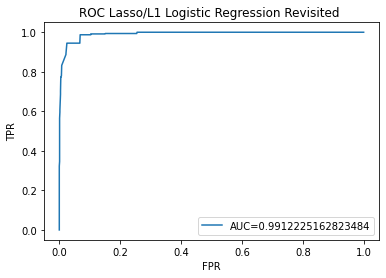

BMI 0.0
Smoking 0.0
AlcoholDrinking 0.0
Stroke 0.0
PhysicalHealth 0.0
MentalHealth 0.0
DiffWalking -0.13168141818492637
Diabetic 0.0
PhysicalActivity 0.0
SleepTime 0.0
Asthma 0.0
KidneyDisease 0.0
SkinCancer 0.0
Race_American Indian/Alaskan Native 0.0
Race_Asian 0.0
Race_Black 0.0
Race_Hispanic 0.0
Race_Other 0.0
Race_White 0.0
general_health_factor 0.9063438018897204
age_factor -0.6653442415821813
sex_factor 0.0
[('BMI', 0.0), ('Smoking', 0.0), ('AlcoholDrinking', 0.0), ('Stroke', 0.0), ('PhysicalHealth', 0.0), ('MentalHealth', 0.0), ('DiffWalking', -0.1317), ('Diabetic', 0.0), ('PhysicalActivity', 0.0), ('SleepTime', 0.0), ('Asthma', 0.0), ('KidneyDisease', 0.0), ('SkinCancer', 0.0), ('Race_American Indian/Alaskan Native', 0.0), ('Race_Asian', 0.0), ('Race_Black', 0.0), ('Race_Hispanic', 0.0), ('Race_Other', 0.0), ('Race_White', 0.0), ('general_health_factor', 0.9063), ('age_factor', -0.6653), ('sex_factor', 0.0)]


<Figure size 432x288 with 0 Axes>

In [ ]:
# Let's add LASSO/L1 penalty to our logictic regression model
lasso_revisited_weird = LogisticRegression(penalty='elasticnet', solver='saga', C=0.006, l1_ratio=1)
lasso_revisited_weird.fit(x_train_weird, y_train_weird)
y_pred_weird = lasso_revisited_weird.predict(x_test_weird)
print("accuracy score for Lasso/L1 Logistic Regression for weird data: ", accuracy_score(y_test_weird, y_pred_weird))
print(confusion_matrix(y_test_weird, y_pred_weird))
plot_roc_curve(x_test_weird, y_test_weird, lasso_revisited_weird, "Lasso/L1 Logistic Regression Revisited ")

data_weird = []

for i in range(len(features.columns)):
  print(features.columns[i], lasso_revisited_weird.coef_[0][i])
  data_weird.append((features.columns[i], round(lasso_revisited_weird.coef_[0][i], 4)))
print(data_weird)

If we let C=1, we can attain an accuracy score of 99%. We chose to find a C value that can keep a relatively high accuracy score with as few features as possible. We found that with only the three features: DiffWalking, general_health_factor and age_factor we explained for 93% of the data.

accuracy score for Lasso/L1 Logistic Regression:  0.9657320872274143
[[3125  195]
 [  47 3695]]


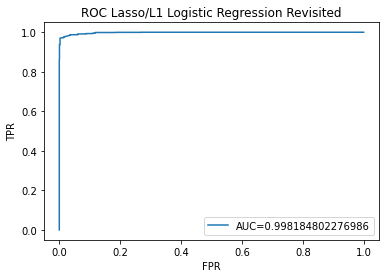

BMI 0.0
Smoking 0.0
AlcoholDrinking 0.0
Stroke 4.974738494385039e-06
PhysicalHealth 0.0
MentalHealth 0.0
DiffWalking 0.0
Diabetic 0.0
PhysicalActivity 0.0
SleepTime 0.0
Asthma 0.0
KidneyDisease 0.0
SkinCancer 0.0
Race_American Indian/Alaskan Native 0.0
Race_Asian 0.0
Race_Black 0.0
Race_Hispanic 0.0
Race_Other 0.0
Race_White 0.0
general_health_factor -0.7363750141878743
age_factor 0.6914290954221826
sex_factor 0.0
[('BMI', 0.0), ('Smoking', 0.0), ('AlcoholDrinking', 0.0), ('Stroke', 0.0), ('PhysicalHealth', 0.0), ('MentalHealth', 0.0), ('DiffWalking', 0.0), ('Diabetic', 0.0), ('PhysicalActivity', 0.0), ('SleepTime', 0.0), ('Asthma', 0.0), ('KidneyDisease', 0.0), ('SkinCancer', 0.0), ('Race_American Indian/Alaskan Native', 0.0), ('Race_Asian', 0.0), ('Race_Black', 0.0), ('Race_Hispanic', 0.0), ('Race_Other', 0.0), ('Race_White', 0.0), ('general_health_factor', -0.7364), ('age_factor', 0.6914), ('sex_factor', 0.0)]


<Figure size 432x288 with 0 Axes>

In [ ]:
# Let's add LASSO/L1 penalty to our logictic regression model
lasso_revisited_good = LogisticRegression(penalty='elasticnet', solver='saga', C=0.0009, l1_ratio=1)
lasso_revisited_good.fit(x_train_good, y_train_good)
y_pred_good = lasso_revisited_good.predict(x_test_good)
print("accuracy score for Lasso/L1 Logistic Regression: ", accuracy_score(y_test_good, y_pred_good))
print(confusion_matrix(y_test_good, y_pred_good))
plot_roc_curve(x_test_good, y_test_good, lasso_revisited_good, "Lasso/L1 Logistic Regression Revisited")


data_good = []
for i in range(len(features.columns)):
  print(features.columns[i], lasso_revisited_good.coef_[0][i])
  data_good.append((features.columns[i], round(lasso_revisited_good.coef_[0][i], 4)))
print(data_good)

Similarly to the weird data, for the good data, setting a C=1 also produces a 99% accuracy. That said, we still attained a 96% accuracy with just Stroke, general_health_factor and age_factor.

In [ ]:
for i in data_good:
  if i[1] != 0:
    print(i)

print("\n")
for j in data_weird:
  if j[1] != 0:
    print(j)

('general_health_factor', -0.7364)
('age_factor', 0.6914)


('DiffWalking', -0.1317)
('general_health_factor', 0.9063)
('age_factor', -0.6653)


Upon further investigation of the values, we see that the two most significant features in both the good and wierd data are general_health_factor and age_factor. If we look at the coefficiants of each, we see they are highly negatively correlated thus makeing it impossible with just our data to capture the neuance between these two groups. 

# Summary 


We started with a health data set that had already gone through some pre-screening and cleanup. The original datset encompassing the BFRSS survey results contained a whopping 278 columns, while our starting dataset contained merely 18 features (eventually became 22 features after some EDA and encoding). Generally, a reduced number of key features is precisely our goal. After all, a key question we are trying to answer through our analysis is 'What are the minimal key features that best predict whether an individual has heart disease?'. We proceeded to run several models (unsupervised first ands then supervised) to reach our eventul goal of discovering these minimal key features and to train a model to best predict heart disease based on these features. One thing to note is that we recognized that our data is imbalanced and accounted for the imbalance by using resampling methods. For singular models, we discovered that our Unregularized Logistic Regression model performed the best (based on accuracy and AUROC scores). To dive deeper into the cause of our accuracy scores maxing out below 80%, we trained and implemented an Ensemble Classifier and took a closer look at the data points that were misclassified by all 5 of the models partaking in the ensemble. We discovered that the data is contradictory primarily on two features, general health factor and age factor. There could be two explanations for this phenomenon. First, survey answers were innacurate. Although it dooes not sound realistic for people to provide the wrong age, it is very likely that people misdiagnosed there level of general health. Second, there most likely are other key features that were excluded from either our initial dataset or from the initial VFRSS survey. These additional key features would help our models better classify heart disease beyond relying on the two more obvious features. 

#Next Steps

Based on our discoveries and analysis, we believe the next step is to revisit the original dataset from the BFRSS survey results and include all original 278 features in our analysis. There are likely some key features of predicting heart disease that our models missed. Although the number of features is quite large, techniques that we have already implemented (i.e. PCA) will help reduce multi-colinearity and thus the number of features). If our model accuracies improve, then we have our minal key features for predicting heart disease. If accuracies do not noticeably improve, then we must question whether the original BFRSS survey had sufficient questions.